In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram 

In [2]:
secret_num = '110001'

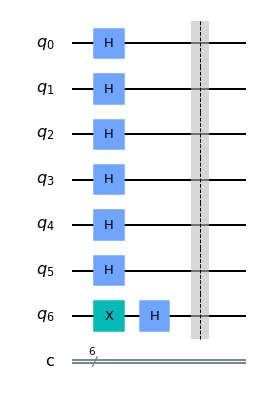

In [3]:
size = len(secret_num)
circuit = QuantumCircuit(size+1, size)
circuit.h(range(size))
circuit.x(size)
circuit.h(size)
circuit.barrier()
circuit.draw(output='mpl')

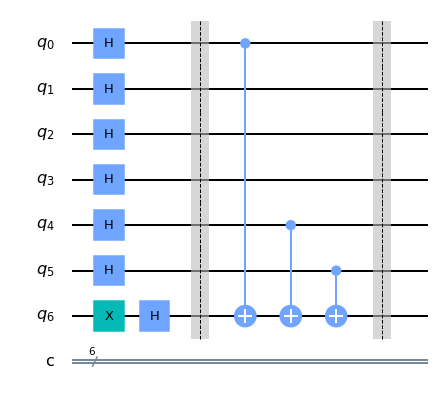

In [4]:
for ii, yesno in enumerate(reversed(secret_num)):
    if yesno == '1':
        circuit.cx(ii, size)
        
circuit.barrier()
circuit.draw(output='mpl')

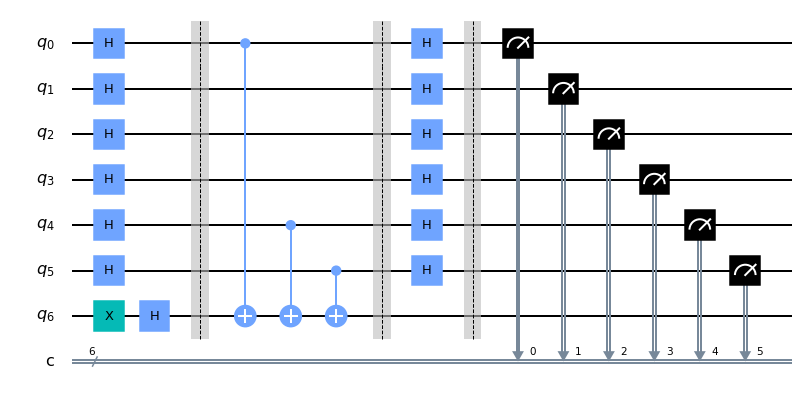

In [5]:
circuit.h(range(size))
circuit.barrier()

circuit.measure(range(size), range(size))
circuit.draw(output='mpl')

In [6]:
simulator = Aer.get_backend('qasm_simulator')
results = execute(circuit, backend=simulator, shots=1).result()
counts = results.get_counts()
print(counts)

{'110001': 1}
